In [26]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [27]:
pre_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
pre_df.head().dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

In [28]:
pre_df.shape

(344, 8)

In [29]:
pre_df.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [30]:
pre_df.isna().sum().sum()

19

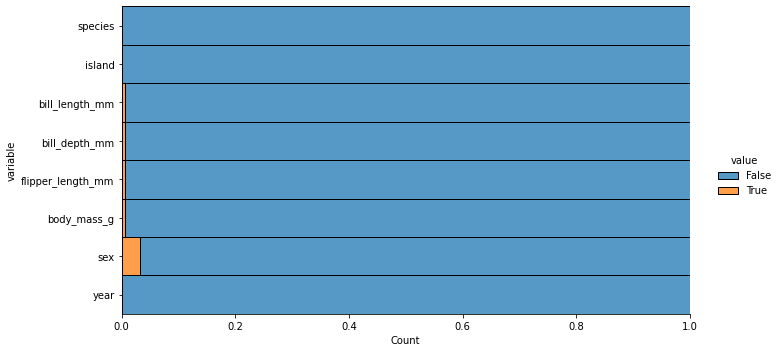

In [31]:
sns.displot(
    data = pre_df.isna().melt(),
    y = 'variable',
    hue = 'value',
    multiple = 'fill',
    aspect = 2
)

In [33]:
df = pre_df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [102]:
print(df['species'].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


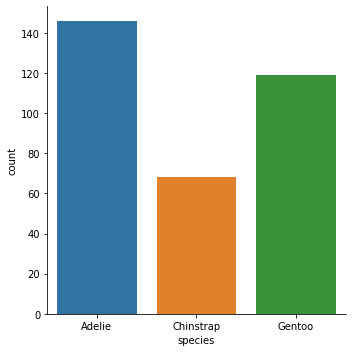

In [84]:
sns.catplot(
    data=df,
    x='species',
    kind='count'
)

In [41]:
df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [49]:
df = df.astype({
    'species' : 'category',
    'island' : 'category',
    'sex' : 'category'
    })

In [55]:
df.describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [99]:
df['species'].value_counts().cat

AttributeError: Can only use .cat accessor with a 'category' dtype